<a href="https://colab.research.google.com/github/PriyankaAdimulam12/Python_Intro/blob/main/Normal_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy import stats
stats.norm.cdf(680,711,29)

np.float64(0.14254260383881612)

In [2]:
stats.norm.cdf(740,711,29)-stats.norm.cdf(697,711,29)

np.float64(0.5267111786415019)

In [3]:
import pandas as pd
import numpy as np

In [4]:
beml_df = pd.read_csv("BEML.csv")
beml_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [5]:
glaxo_df = pd.read_csv("GLAXO.csv")
glaxo_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


Actually we dont need all these columns,we need only Date & Close..

In [6]:
beml_df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.00,1151.00,1121.00,1134.00,1135.60,101651.0,1157.18
1,2010-01-05,1146.80,1149.00,1128.75,1135.00,1134.60,59504.0,676.47
2,2010-01-06,1140.00,1164.25,1130.05,1137.00,1139.60,128908.0,1482.84
3,2010-01-07,1142.00,1159.40,1119.20,1141.00,1144.15,117871.0,1352.98
4,2010-01-08,1156.00,1172.00,1140.00,1141.20,1144.05,170063.0,1971.42
...,...,...,...,...,...,...,...,...
1734,2016-12-26,965.00,965.05,935.00,950.10,950.25,398696.0,3783.63
1735,2016-12-27,960.70,989.00,952.35,974.00,975.70,808561.0,7885.14
1736,2016-12-28,980.75,985.00,970.15,977.00,974.40,367041.0,3592.49
1737,2016-12-29,977.10,997.95,974.55,985.15,986.05,555233.0,5489.14


In [7]:
beml_df = beml_df[['Date','Close']]
glaxo_df = glaxo_df[['Date','Close']]

In [8]:
beml_df

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


Now we have modified our dataset..

In [9]:
# '''The DataFrames have a date column, so we can
# create a DatetimeIndex index from this column Date. It will ensure that the rows are sorted by time in
# ascending order.'''
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

In [10]:
beml_df

,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05
...,...,...
2016-12-26,2016-12-26,950.25
2016-12-27,2016-12-27,975.70
2016-12-28,2016-12-28,974.40


Text(0, 0.5, 'Close Price')

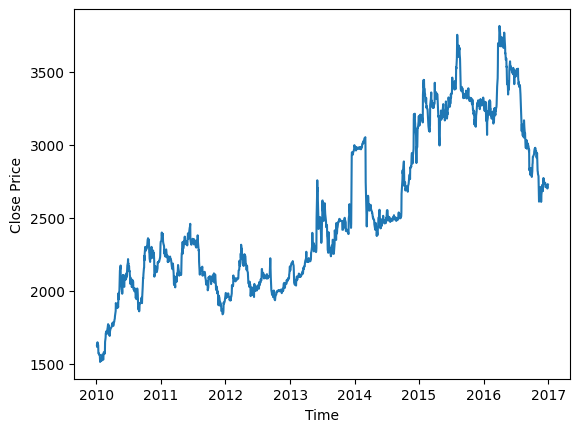

In [11]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.plot(glaxo_df.Close)
plt.xlabel('Time')
plt.ylabel('Close Price')

Text(0, 0.5, 'Close Price')

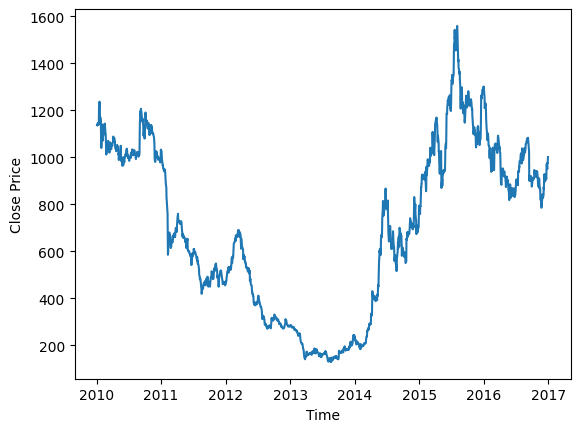

In [12]:
plt.plot(beml_df.Close)
plt.xlabel('Time')
plt.ylabel('Close Price')

In [13]:
#To calculate daily returns,i.e daily rate of return
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods = 1)
beml_df['gain'] = beml_df.Close.pct_change(periods = 1)
glaxo_df

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
...,...,...,...
2016-12-26,2016-12-26,2723.50,-0.001283
2016-12-27,2016-12-27,2701.75,-0.007986
2016-12-28,2016-12-28,2702.15,0.000148


In [14]:
beml_df

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1135.60,NaN
2010-01-05,2010-01-05,1134.60,-0.000881
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087
...,...,...,...
2016-12-26,2016-12-26,950.25,-0.021924
2016-12-27,2016-12-27,975.70,0.026782
2016-12-28,2016-12-28,974.40,-0.001332


In [15]:
#drop first row since it is NaN
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()

In [16]:
glaxo_df

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
2010-01-11,2010-01-11,1629.45,-0.006312
...,...,...,...
2016-12-26,2016-12-26,2723.50,-0.001283
2016-12-27,2016-12-27,2701.75,-0.007986
2016-12-28,2016-12-28,2702.15,0.000148


In [17]:
beml_df

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1134.60,-0.000881
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087
2010-01-11,2010-01-11,1137.00,-0.006162
...,...,...,...
2016-12-26,2016-12-26,950.25,-0.021924
2016-12-27,2016-12-27,975.70,0.026782
2016-12-28,2016-12-28,974.40,-0.001332


In [18]:
glaxo_df.isnull().sum()
#Checking whether it has anu null values..

,0
Date,0
Close,0
gain,0


In [19]:
beml_df.isnull().sum()
#Checking whether it has any null values..

,0
Date,0
Close,0
gain,0


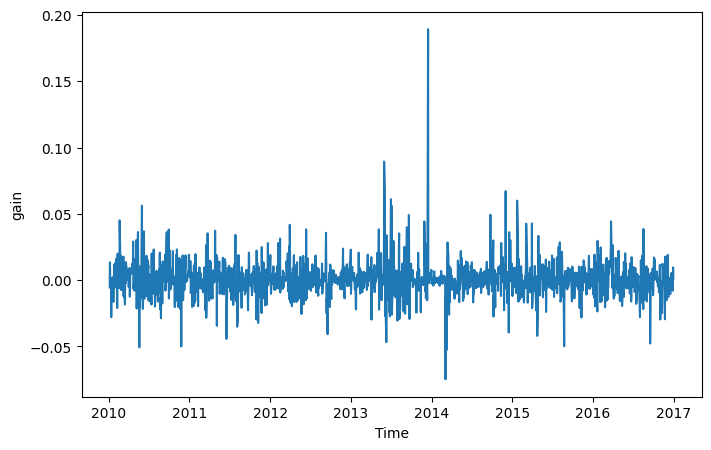

In [20]:
#here its plotting the gains..
plt.figure(figsize = (8, 5))
plt.plot(glaxo_df.gain)
plt.xlabel('Time')
plt.ylabel('gain')
plt.show()

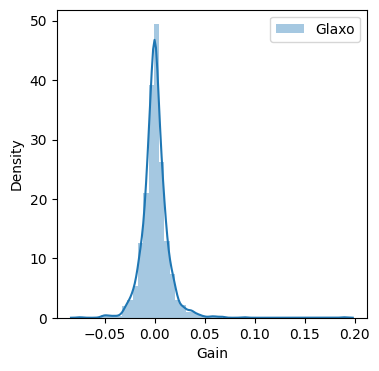

In [21]:
#we can create the distribution plot
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(4,4))
sn.distplot(glaxo_df.gain, label = 'Glaxo')
plt.xlabel('Gain')
plt.ylabel('Density')
plt.legend()
# for BEML there is more variance (high risk or volatality) than GLAXO

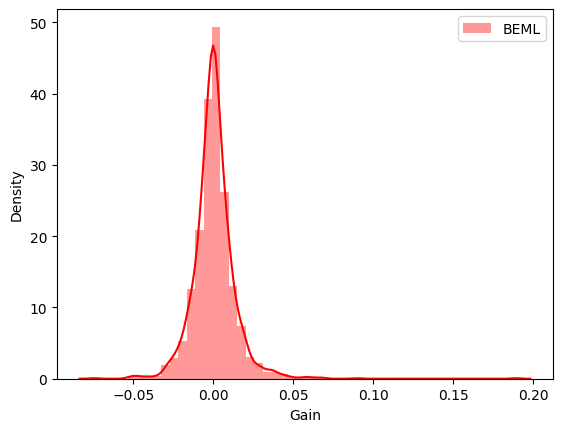

In [22]:
sn.distplot(glaxo_df.gain, label = 'BEML',color='r')
plt.xlabel('Gain')
plt.ylabel('Density')
plt.legend()
plt.show()

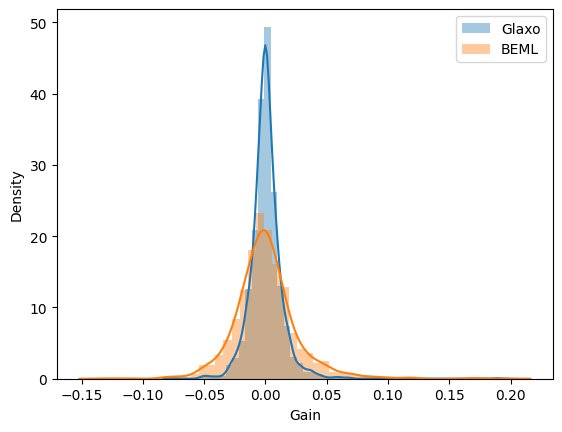

In [23]:
x=pd.DataFrame(columns=["beml_df.gain","glaxo_df.gain"])
x["beml_df.gain"]= pd.Series(beml_df.gain)
x["glaxo_df.gain"]=pd.Series(glaxo_df.gain)
sn.distplot(x['glaxo_df.gain'], label = 'Glaxo')
sn.distplot(x['beml_df.gain'], label = 'BEML')
plt.xlabel('Gain')
plt.ylabel('Density')
plt.legend()

In [24]:
# Glaxo Mean and Standard Deviation
print('Mean:', round(glaxo_df.gain.mean(), 4)) #this round the mean upto 4 decimals
print('Standard Deviation: ', round(glaxo_df.gain.std(), 4))

Mean: 0.0004
Standard Deviation:  0.0134


In [25]:
# BEML Mean and Standard Deviation
print('Mean: ', round(beml_df.gain.mean(), 4))  #this round the mean upto 4 decimals
print('Standard Deviation: ', round(beml_df.gain.std(), 4))
# BEML has high std,so it is more Risker..

Mean:  0.0003
Standard Deviation:  0.0264


In [26]:
from scipy import stats
# import scipy
#Probability of making 2% loss or higher loss in Glaxo - left of 0 i.e.e -0.02
stats.norm.cdf(-0.02,0.0004, 0.0134) # norm.cdf(0.02,mean,std)
#scale=glaxo_df.gain.std()) # there are 6% of chances having 2% or higher loss

np.float64(0.06395593743937553)

In [27]:
#for the above you can do like this as well..
from scipy import stats
stats.norm.cdf(-0.02,glaxo_df.gain.mean(),glaxo_df.gain.std())

np.float64(0.06352488667177397)

In [28]:
#Probability of making 2% gain or higher loss in Glaxo
1-stats.norm.cdf(0.02,glaxo_df.gain.mean(),glaxo_df.gain.std())

np.float64(0.07104511457618568)